In [52]:
from manim import *
from yty_manim.basic_unit.squ_tex import *

class Page(VGroup):
    def __init__(
            self,
            page_lst: list,
            page_frame_num: int = 3,
            one_step = (1.5,0.45),
            color_lst: list = None,
    ):
        super().__init__()
        
        self.page_lst = page_lst
        self.one_step = one_step
        
        if color_lst is None:
            color_lst = [RED, ORANGE, YELLOW, GREEN, TEAL, BLUE, PURPLE]
        self.color_lst = color_lst
        
        if page_frame_num <= len(self.color_lst):
            self.page_frame_num = page_frame_num
        else:
            raise ValueError("页框数必须小于颜色数")
        
        self._construct()
        
    def _construct(self):
        self.pages = SquTex(self.page_lst ,stroke_opacity = 0,side_length= self.one_step[0]).scale(self.one_step[1])
        self.page_frame = SquTex(
            ["" for i in range(self.page_frame_num)],
            arrange_direction=DOWN,
            side_length = 1,
            fill_color =  BLUE,
            fill_opacity = 0.5,
            stroke_opacity = 0.8,
            color = BLUE
        ).scale(0.45).next_to(self.pages, DOWN,buff=0)
        self.page_frame.shift(LEFT*self.one_step[0]*self.one_step[1]*(len(self.page_lst)/2))
        
        self.opt_frame = VGroup()
        for i in range(self.page_frame_num):
            self.page_frame.change_square(i,color = self.color_lst[i])
            opt_squ = Square(side_length=1).set_color(self.color_lst[i]).move_to(self.pages[i]).scale(self.one_step[1])
            self.opt_frame.add(opt_squ)
        
        self.add(self.pages,self.page_frame,self.opt_frame)

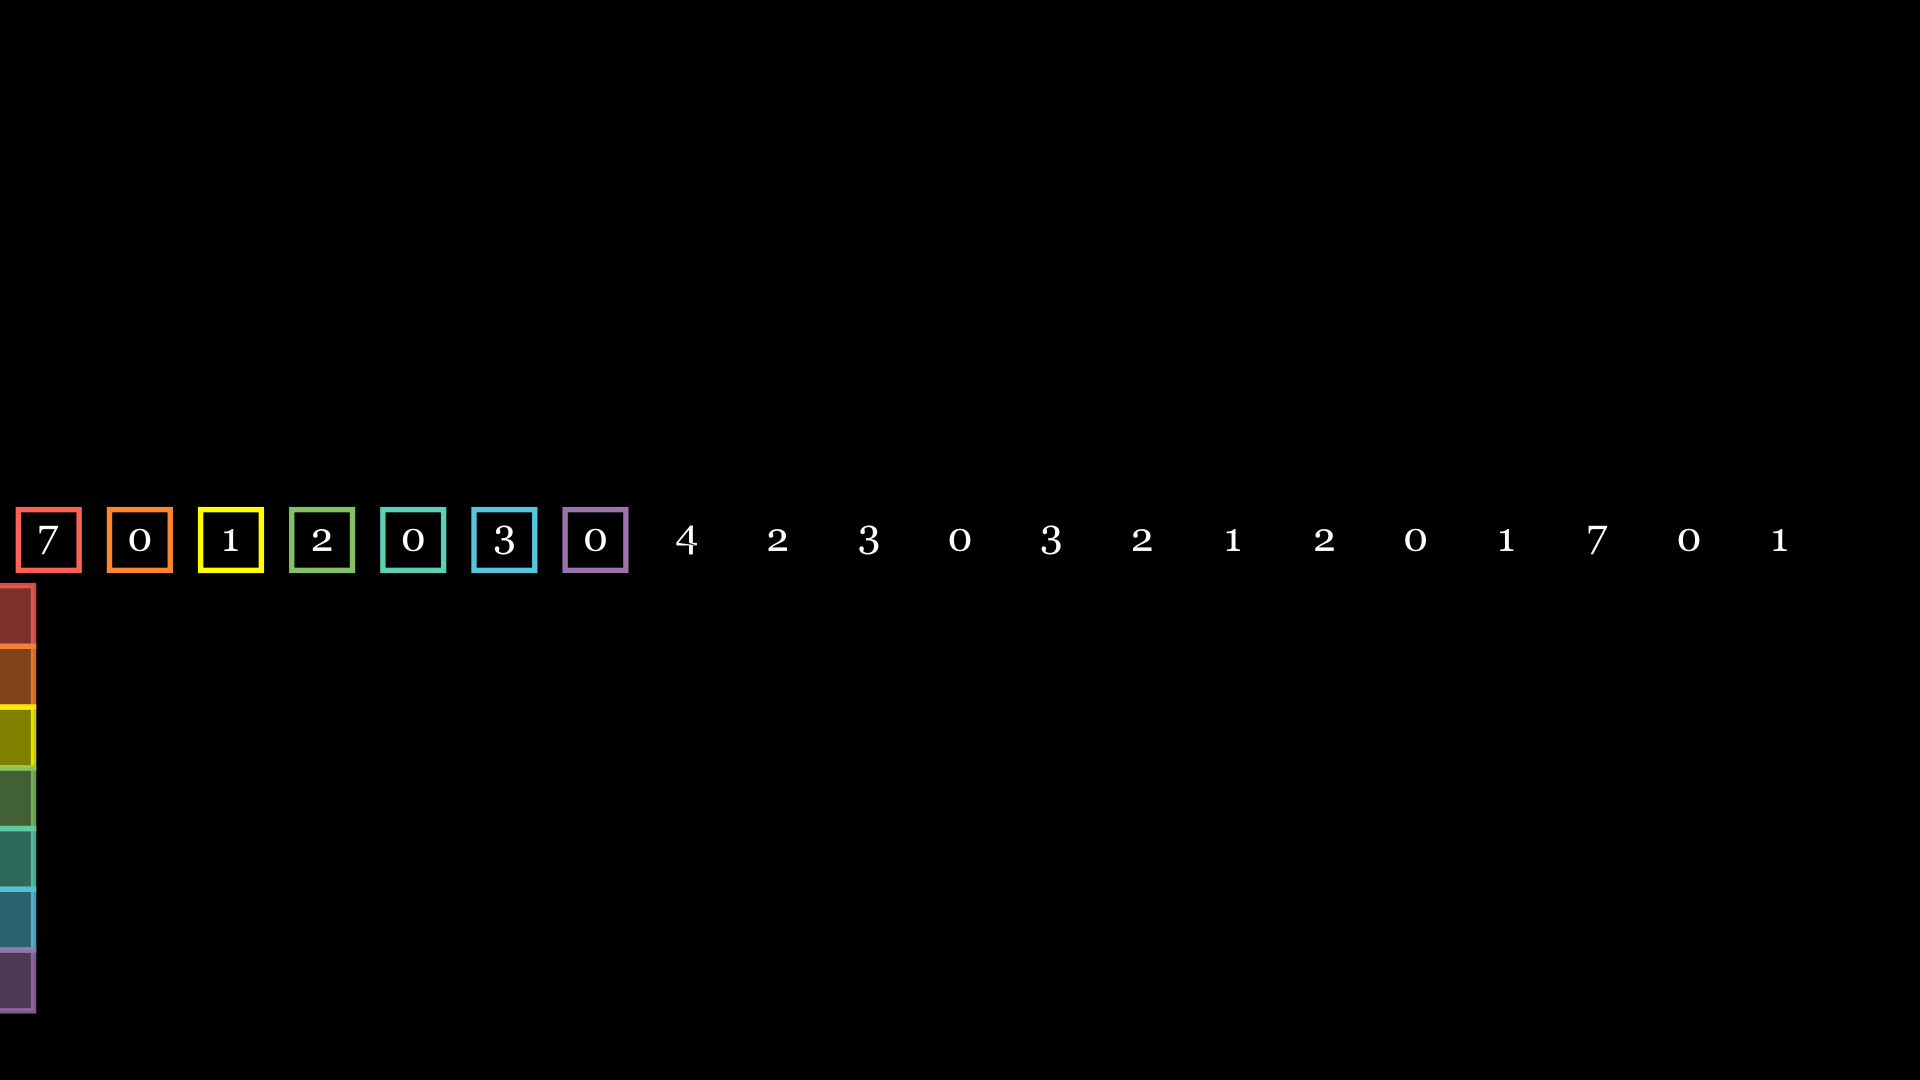

In [54]:
%%manim -qh -v WARNING PageTest
class PageTest(Scene):
    def construct(self):
        p = Page([7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "],7)
        self.add(p)